In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

fn = lambda x: torch.sin(x)

class SimpleNN(nn.Module):
    def __init__(self):
        super(SimpleNN, self).__init__()
        self.fc1 = nn.Linear(1, 4)
        self.hfc1 = nn.Linear(4, 4)
        self.relu = nn.ReLU()
        self.hfc2 = nn.Linear(4, 4)
        self.fc2 = nn.Linear(4, 1)

    def forward(self, x):
        x = self.fc1(x)
        x = self.relu(x)
        x = self.hfc1(x)
        x = self.relu(x)
        x = self.hfc2(x)
        x = self.relu(x)
        x = self.fc2(x)
        return x

def generate_data():
    x = torch.unsqueeze(torch.linspace(0, 3.14, 100), dim=1)
    y = fn(x)
    return x, y

def train(model, criterion, optimizer, loss_l, num_epochs=1000):
    for epoch in range(num_epochs):
        inputs, targets = generate_data()
        outputs = model(inputs)
        loss = criterion(outputs, targets)
        loss_l.append(loss)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if (epoch + 1) % 100 == 0:
            print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

# 创建神经网络、损失函数和优化器
model = SimpleNN()
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

# 训练模型
loss_t = []
train(model, criterion, optimizer, loss_t, num_epochs=500)

Epoch [100/500], Loss: 0.0067
Epoch [200/500], Loss: 0.0040
Epoch [300/500], Loss: 0.0040
Epoch [400/500], Loss: 0.0040
Epoch [500/500], Loss: 0.0040


tensor(0.0002)


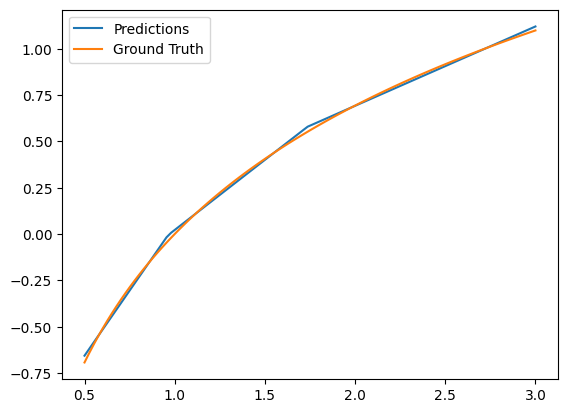

In [ ]:
with torch.no_grad():
    test_x, test_y = generate_data()
    predictions = model(test_x)
    print(criterion(test_y, predictions))
    plt.plot(test_x.numpy(), predictions.numpy(), label='Predictions')
    plt.plot(test_x.numpy(), test_y.numpy(), label='Ground Truth')
    plt.legend()
    plt.show()

In [ ]:
!pip install pennylane

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 17.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 64.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.9/49.9 kB 5.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.0/14.0 MB 68.1 MB/s eta 0:00:00


In [ ]:
import pennylane as qml

class SimpleQNN(nn.Module):
    def __init__(self):
      super(SimpleQNN, self).__init__()
      self.input_size = 1
      self.output_size = 1
      self.n_qubits = 4
      self.n_qlayers = 1
      self.backend = "default.qubit"  # "default.qubit", "qiskit.basicaer", "qiskit.ibm"

      #self.dev = qml.device("default.qubit", wires=self.n_qubits)
      #self.dev = qml.device('qiskit.basicaer', wires=self.n_qubits)
      #self.dev = qml.device('qiskit.ibm', wires=self.n_qubits)
      # use 'qiskit.ibmq' instead to run on hardware

      self.wires = [f"wire_forget_{i}" for i in range(self.n_qubits)]

      self.dev = qml.device(self.backend, wires=self.wires)

      def _circuit_(inputs, weights):
          qml.templates.AngleEmbedding(inputs, wires=self.wires)
          qml.templates.BasicEntanglerLayers(weights, wires=self.wires)
          return [qml.expval(qml.PauliZ(wires=w)) for w in self.wires]
      self.qlayer = qml.QNode(_circuit_, self.dev, interface="torch")

      weight_shapes = {"weights": (self.n_qlayers, self.n_qubits)}

      self.clayer_in = torch.nn.Linear(self.input_size, self.n_qubits)
      self.VQC1 =  qml.qnn.TorchLayer(self.qlayer, weight_shapes)
      self.VQC2 =  qml.qnn.TorchLayer(self.qlayer, weight_shapes)
      self.clayer_out = torch.nn.Linear(self.n_qubits, self.output_size)
      #self.clayer_out = [torch.nn.Linear(n_qubits, self.hidden_size) for _ in range(4)]
      self.relu = nn.ReLU()

    def forward(self, x):
        x = self.clayer_in(x)
        x = self.relu(x)
        x = self.VQC1(x)
        x = self.relu(x)
        x = self.VQC2(x)
        x = self.relu(x)
        x = self.clayer_out(x)
        return x

model = SimpleQNN()
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

# 训练模型
loss_q = []
train(model, criterion, optimizer, loss_q, num_epochs=500)

Epoch [100/500], Loss: 0.0239
Epoch [200/500], Loss: 0.0049
Epoch [300/500], Loss: 0.0023
Epoch [400/500], Loss: 0.0012
Epoch [500/500], Loss: 0.0008


tensor(0.0003)


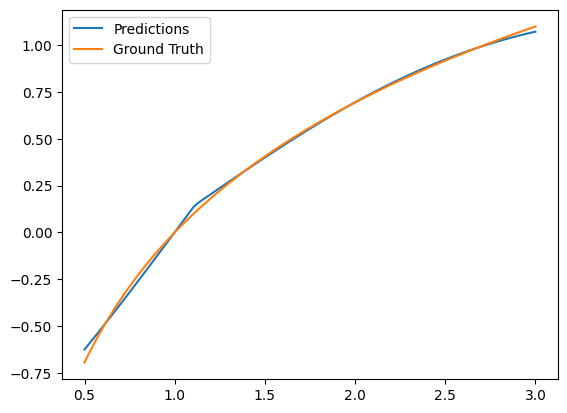

In [ ]:
with torch.no_grad():
    test_x, test_y = generate_data()
    predictions = model(test_x)
    print(criterion(test_y, predictions))
    plt.plot(test_x.numpy(), predictions.numpy(), label='Predictions')
    plt.plot(test_x.numpy(), test_y.numpy(), label='Ground Truth')
    plt.legend()
    plt.show()

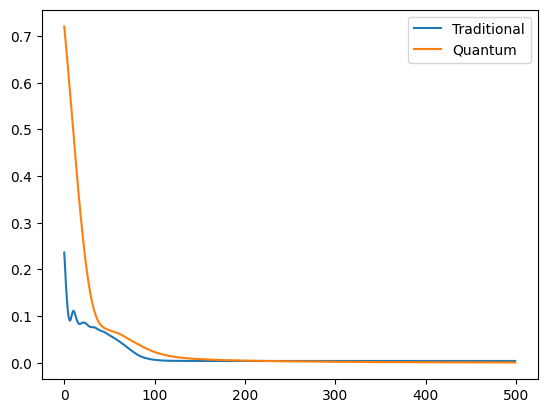

In [ ]:
with torch.no_grad():
    plt.plot(loss_t, label='Traditional')
    plt.plot(loss_q, label='Quantum')
    plt.legend()
    plt.show()

In [ ]:
model_1 = SimpleNN()
model_2 = SimpleQNN()
criterion = nn.MSELoss()
optimizer_1 = optim.Adam(model_1.parameters(), lr=0.01)
optimizer_2 = optim.Adam(model_2.parameters(), lr=0.01)

# 训练模型
loss_q = []
loss_t = []
train(model_1, criterion, optimizer_1, loss_t, num_epochs=500)
train(model_2, criterion, optimizer_2, loss_q, num_epochs=500)

Epoch [100/500], Loss: 0.0941
Epoch [200/500], Loss: 0.0657
Epoch [300/500], Loss: 0.0095
Epoch [400/500], Loss: 0.0026
Epoch [500/500], Loss: 0.0020
Epoch [100/500], Loss: 0.0653
Epoch [200/500], Loss: 0.0001
Epoch [300/500], Loss: 0.0000
Epoch [400/500], Loss: 0.0000
Epoch [500/500], Loss: 0.0000


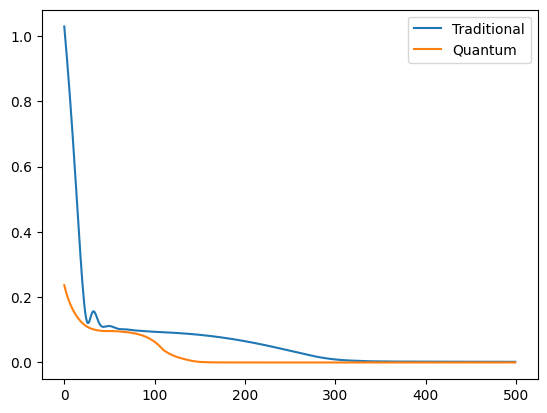

In [ ]:
with torch.no_grad():
    plt.plot(loss_t, label='Traditional')
    plt.plot(loss_q, label='Quantum')
    plt.legend()
    plt.show()

In [ ]:
model_1 = SimpleQNN()
model_2 = SimpleQNN()
model_3 = SimpleQNN()
model_4 = SimpleQNN()
criterion = nn.MSELoss()
optimizer_1 = optim.Adam(model_1.parameters(), lr=0.001)
optimizer_2 = optim.Adam(model_2.parameters(), lr=0.01)
optimizer_3 = optim.Adam(model_1.parameters(), lr=0.05)
optimizer_4 = optim.Adam(model_2.parameters(), lr=0.1)


# 训练模型
loss_1 = []
loss_2 = []
loss_3 = []
loss_4 = []
train(model_1, criterion, optimizer_1, loss_1, num_epochs=500)
train(model_2, criterion, optimizer_2, loss_2, num_epochs=500)
train(model_3, criterion, optimizer_3, loss_3, num_epochs=500)
train(model_4, criterion, optimizer_4, loss_4, num_epochs=500)

Epoch [100/500], Loss: 0.6918
Epoch [200/500], Loss: 0.5581
Epoch [300/500], Loss: 0.4487
Epoch [400/500], Loss: 0.3605
Epoch [500/500], Loss: 0.2906
Epoch [100/500], Loss: 0.0977
Epoch [200/500], Loss: 0.0964
Epoch [300/500], Loss: 0.0613
Epoch [400/500], Loss: 0.0048
Epoch [500/500], Loss: 0.0021
Epoch [100/500], Loss: 0.1414
Epoch [200/500], Loss: 0.1414
Epoch [300/500], Loss: 0.1414
Epoch [400/500], Loss: 0.1414
Epoch [500/500], Loss: 0.1414
Epoch [100/500], Loss: 0.8319
Epoch [200/500], Loss: 0.8319
Epoch [300/500], Loss: 0.8319
Epoch [400/500], Loss: 0.8319
Epoch [500/500], Loss: 0.8319


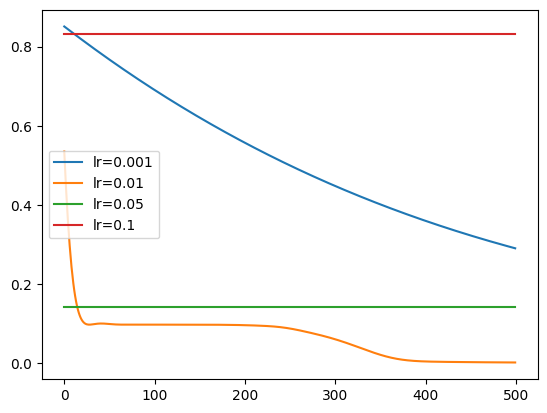

In [ ]:
with torch.no_grad():
    plt.plot(loss_1, label='lr=0.001')
    plt.plot(loss_2, label='lr=0.01')
    plt.plot(loss_3, label='lr=0.05')
    plt.plot(loss_4, label='lr=0.1')
    plt.legend()
    plt.show()